In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:/Users/efere/Desktop/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [8]:
#find out if there are any null or missing values in the dataset
df.isnull().values.any()

False

In [9]:
df = df.sample(frac=0.2, random_state=1)
print(df.shape)

(56961, 31)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023398C05448>,
      dtype=object)

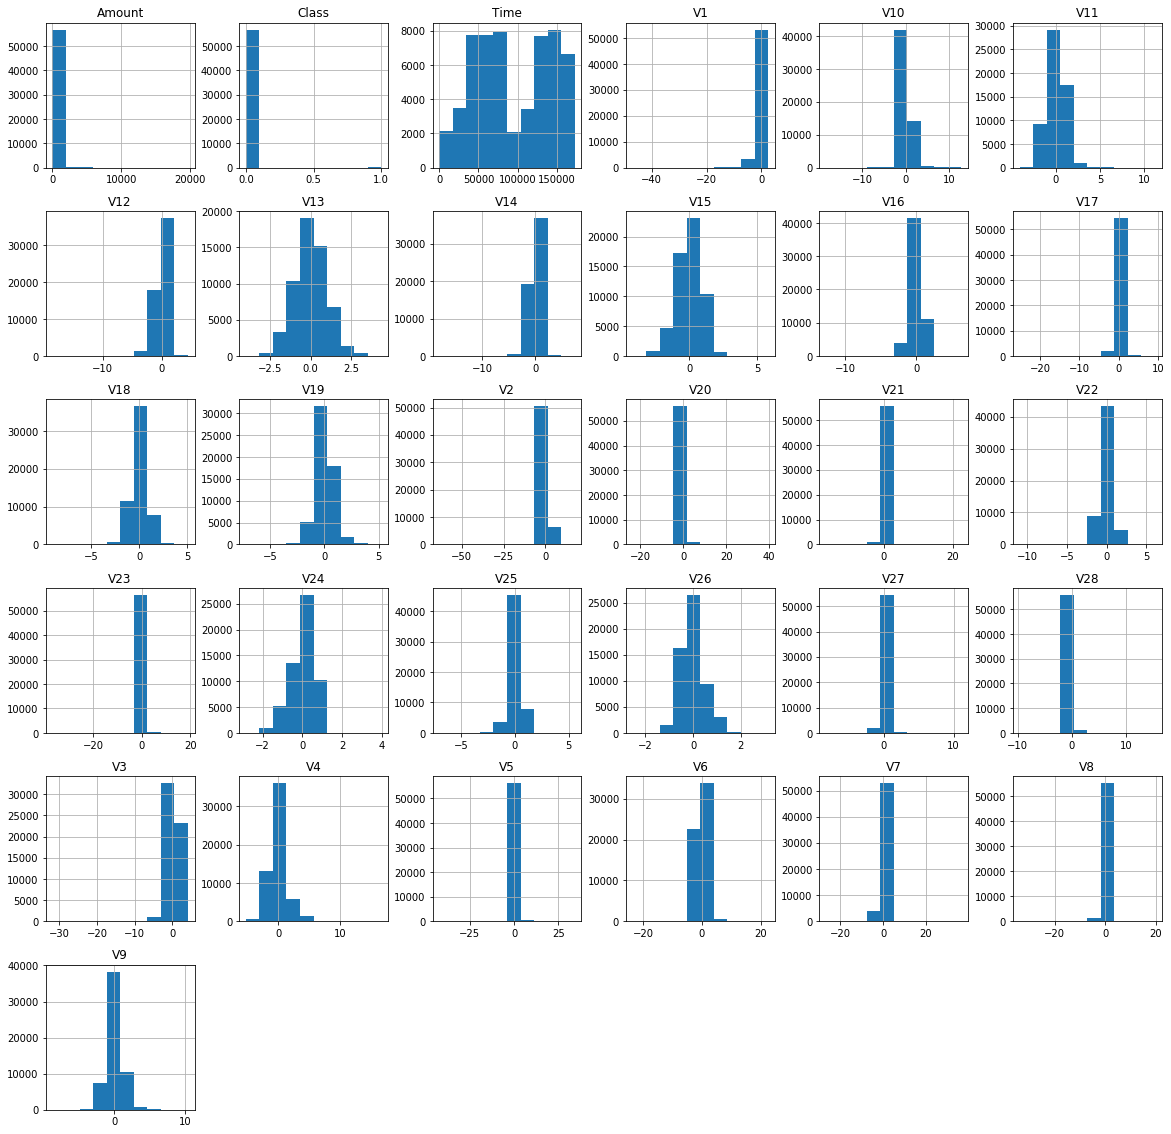

In [13]:
df.hist(figsize=(20,20))

In [15]:
#determine the number of fraud cases
fraud = df[df['Class']==1]
valid = df[df['Class']==0]

outlier_fraction = len(fraud)/len(valid)
print(outlier_fraction)

print("The amount of fraudlent cases: {}".format(len(fraud)))
print("The amount of valid cases: {}".format(len(valid)))

0.0015296972254457222
The amount of fraudlent cases: 87
The amount of valid cases: 56874


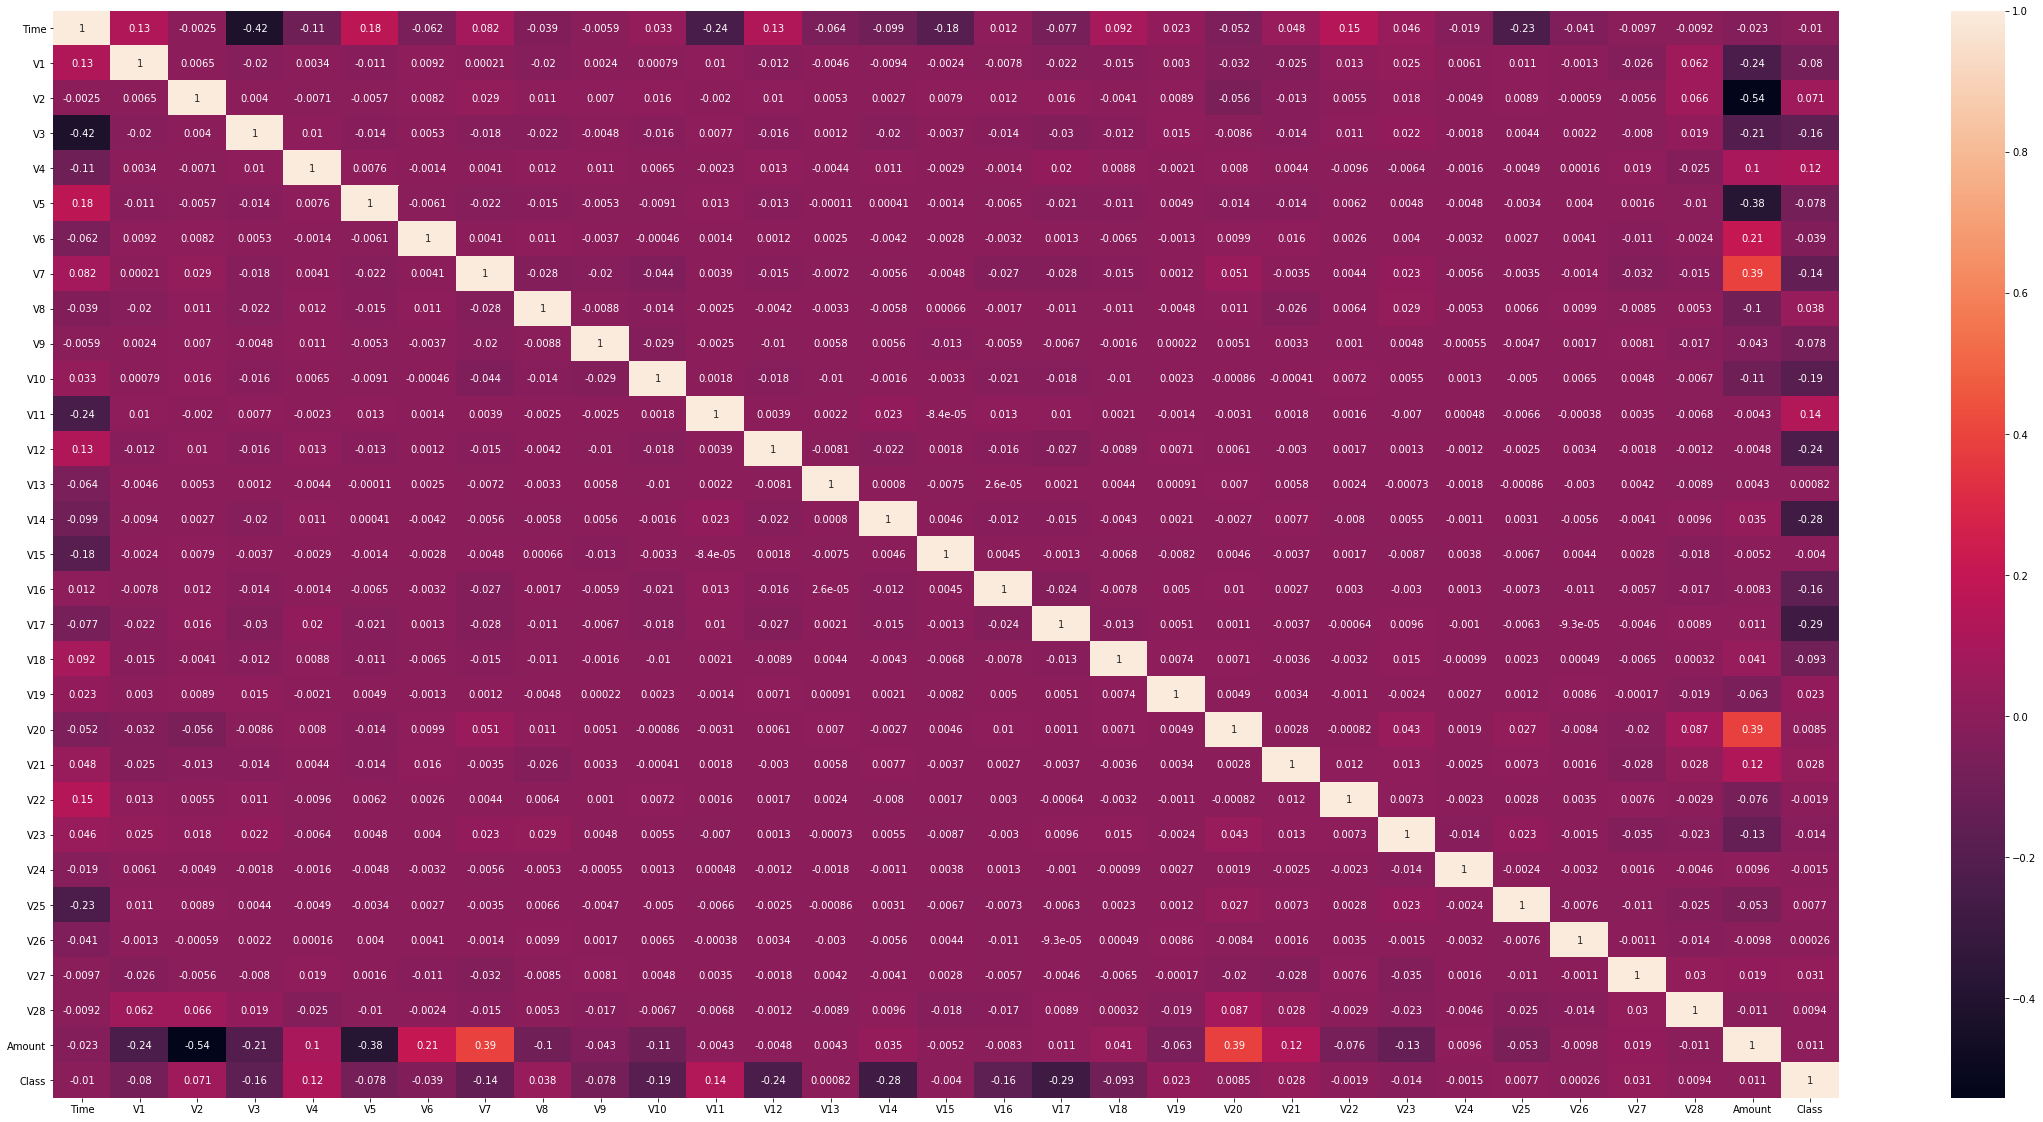

In [28]:
corr = df.corr()
#the features line is used to show the correlation values with each elements
features = corr.index
fig = plt.figure(figsize=(40,20))
sns.heatmap(df[features].corr(), annot=True)

In [29]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
X = df[columns]
Y= df['Class']
print(X.shape, Y.shape)

(56961, 30) (56961,)


In [30]:
#Applying algorithms

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [48]:
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC

In [53]:
#define a random state
state = 1

#making use of 3 classifiers to see which is more accurate 
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest' : IsolationForest(
        max_samples = len(X),
        contamination =outlier_fraction,
        random_state = state
    ),
    'Local Outlier Factor' : LocalOutlierFactor(
        # number of neighbors to consider, the higher the percentage of outliers, the higher you want to make this number
        n_neighbors = 20,
        contamination = outlier_fraction
    ),
    'Support Vector Machine' : OneClassSVM(
        kernel='rbf', 
        degree=3, 
        gamma=0.1,
        nu=0.05,
        max_iter=-1,
    )
}

In [ ]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == 'Support Vector Machine':
        clf.fit(X, Y)
        y_pred = clf.predict(X)
    else:
        #isolation forest
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    #calculate the number of errors
    n_errors = y_pred[y_pred !=Y].sum()
    
    #classification matrix
    print(clf_name, ": ", n_errors)
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest :  65
0.9977352925685996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.26      0.26      0.26        87

    accuracy                           1.00     56961
   macro avg       0.63      0.63      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor :  87
0.9969628342199048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.01      0.01      0.01        87

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

